In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

# Hyperparameter configuration
EPOCH = 100
BATCH = 32
LEARNING_RATE = 1e-5

# Baca dataset dari CSV
file_path = 'sentiment_data.csv'  
df = pd.read_csv(file_path)

# Persiapkan data
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['text'].values,
    df['sentiment'].values,
    test_size=0.2,
    random_state=42
)

Unique sentiment values before mapping: ['Positive' 'Negative']
Number of NaN values in sentiment column: 0




All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/100

4/4 [==============================] - ETA: 0s - loss: 0.7106 - accuracy: 0.4909
Epoch 1: val_accuracy improved from -inf to 0.67857, saving model to model\checkpoint-01
INFO:tensorflow:Assets written to: model\checkpoint-01\assets


INFO:tensorflow:Assets written to: model\checkpoint-01\assets


4/4 [==============================] - 218s 46s/step - loss: 0.7106 - accuracy: 0.4909 - val_loss: 0.6479 - val_accuracy: 0.6786
Epoch 2/100
4/4 [==============================] - ETA: 0s - loss: 0.6306 - accuracy: 0.6364
Epoch 2: val_accuracy did not improve from 0.67857
4/4 [==============================] - 6s 2s/step - loss: 0.6306 - accuracy: 0.6364 - val_loss: 0.6089 - val_accuracy: 0.5714
Epoch 3/100
4/4 [==============================] - ETA: 0s - loss: 0.5413 - accuracy: 0.7727
Epoch 3: val_accuracy improved from 0.67857 to 0.92857, saving model to model\checkpoint-03
INFO:tensorflow:Assets written to: model\checkpoint-03\assets


INFO:tensorflow:Assets written to: model\checkpoint-03\assets


4/4 [==============================] - 120s 39s/step - loss: 0.5413 - accuracy: 0.7727 - val_loss: 0.5145 - val_accuracy: 0.9286
Epoch 4/100
4/4 [==============================] - ETA: 0s - loss: 0.4351 - accuracy: 0.9364
Epoch 4: val_accuracy improved from 0.92857 to 0.96429, saving model to model\checkpoint-04
INFO:tensorflow:Assets written to: model\checkpoint-04\assets


INFO:tensorflow:Assets written to: model\checkpoint-04\assets


4/4 [==============================] - 120s 39s/step - loss: 0.4351 - accuracy: 0.9364 - val_loss: 0.3986 - val_accuracy: 0.9643
Epoch 5/100
4/4 [==============================] - ETA: 0s - loss: 0.3024 - accuracy: 0.9727
Epoch 5: val_accuracy did not improve from 0.96429
4/4 [==============================] - 8s 2s/step - loss: 0.3024 - accuracy: 0.9727 - val_loss: 0.2803 - val_accuracy: 0.9643
Epoch 6/100
4/4 [==============================] - ETA: 0s - loss: 0.2062 - accuracy: 0.9909
Epoch 6: val_accuracy improved from 0.96429 to 1.00000, saving model to model\checkpoint-06
INFO:tensorflow:Assets written to: model\checkpoint-06\assets


INFO:tensorflow:Assets written to: model\checkpoint-06\assets


4/4 [==============================] - 127s 42s/step - loss: 0.2062 - accuracy: 0.9909 - val_loss: 0.1780 - val_accuracy: 1.0000
Epoch 7/100
4/4 [==============================] - ETA: 0s - loss: 0.1359 - accuracy: 1.0000
Epoch 7: val_accuracy did not improve from 1.00000
4/4 [==============================] - 8s 2s/step - loss: 0.1359 - accuracy: 1.0000 - val_loss: 0.1086 - val_accuracy: 1.0000
Epoch 8/100
4/4 [==============================] - ETA: 0s - loss: 0.0797 - accuracy: 1.0000
Epoch 8: val_accuracy did not improve from 1.00000
4/4 [==============================] - 8s 2s/step - loss: 0.0797 - accuracy: 1.0000 - val_loss: 0.0720 - val_accuracy: 1.0000
Epoch 9/100
4/4 [==============================] - ETA: 0s - loss: 0.0455 - accuracy: 1.0000
Epoch 9: val_accuracy did not improve from 1.00000
4/4 [==============================] - 8s 2s/step - loss: 0.0455 - accuracy: 1.0000 - val_loss: 0.0635 - val_accuracy: 0.9643
Epoch 10/100
4/4 [==============================] - ETA: 0s -

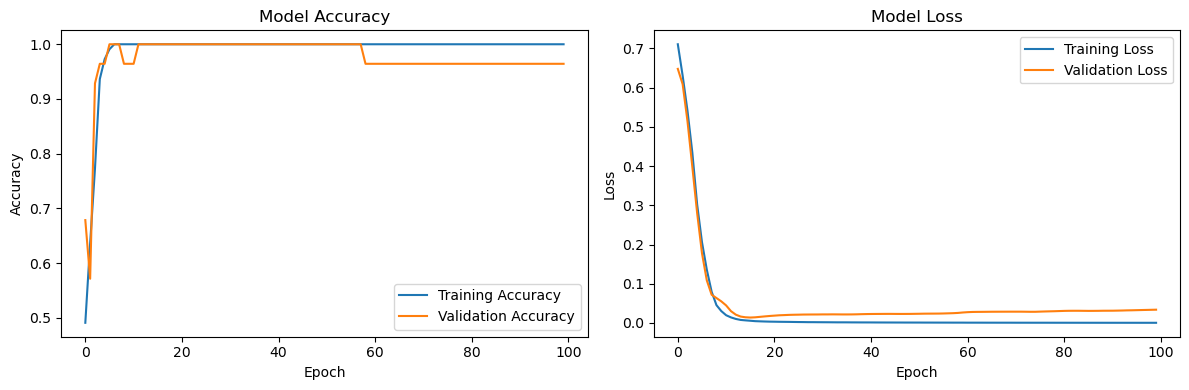

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

# Load dataset from CSV
file_path = 'sentiment_data.csv'  
df = pd.read_csv(file_path)

# Strip leading and trailing spaces from sentiment values
df['sentiment'] = df['sentiment'].str.strip()

# Check for unique values in the sentiment column
print("Unique sentiment values before mapping:", df['sentiment'].unique())

# Convert string labels to numerical labels
df['sentiment'] = df['sentiment'].map({'Positive': 1, 'Negative': 0})

# Check for NaN values after mapping
print("Number of NaN values in sentiment column:", df['sentiment'].isnull().sum())

# Drop rows with NaN values in the sentiment column
df = df.dropna(subset=['sentiment'])

# Ensure sentiment is of integer type
df['sentiment'] = df['sentiment'].astype(int)

# Prepare data
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['text'].values,
    df['sentiment'].values,
    test_size=0.2,
    random_state=42
)

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p1")
model = TFAutoModelForSequenceClassification.from_pretrained(
    "indobenchmark/indobert-base-p1",
    num_labels=2
)

# Tokenize training data
train_encodings = tokenizer(
    list(train_texts),
    truncation=True,
    padding=True,
    max_length=1000,
    return_tensors='tf'
)

# Tokenize test data
test_encodings = tokenizer(
    list(test_texts),
    truncation=True,
    padding=True,
    max_length=1000,
    return_tensors='tf'
)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
)).shuffle(1000).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    test_labels
)).batch(32)

# Compile model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = [tf.keras.metrics.SparseCategoricalAccuracy('accuracy')]

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metrics
)

# Create a callback to save the model checkpoints
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='model/checkpoint-{epoch:02d}',  # Save model with epoch and val_accuracy in the filename
    monitor='val_accuracy',  # Monitor validation accuracy
    save_best_only=True,  # Save only the best model
    mode='max',  # Maximize the monitored quantity
    save_weights_only=False,  # Save the entire model
    verbose=1,  # Print messages when saving
    save_format='tf'  # Save in TensorFlow format
)

# Train model
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=100,
    callbacks=[checkpoint_callback] 
)

# Save the trained model and tokenizer
model.save_pretrained("model")
tokenizer.save_pretrained("model")
print("Model and tokenizer saved to 'model' directory.")

# Visualize training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

# Load and prepare the dataset (using the same preprocessing as in training)
file_path = 'sentiment_data.csv'
df = pd.read_csv(file_path)
df['sentiment'] = df['sentiment'].str.strip()
df['sentiment'] = df['sentiment'].map({'Positive': 1, 'Negative': 0})
df = df.dropna(subset=['sentiment'])
df['sentiment'] = df['sentiment'].astype(int)

# Split the data the same way as in training
_, test_texts, _, test_labels = train_test_split(
    df['text'].values,
    df['sentiment'].values,
    test_size=0.2,
    random_state=42
)

# Load the saved model and tokenizer
model_path = r"C:\Users\dewam\Project Machine Learning and Data Science\sentiment-analysis\model"
model = TFAutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

# Tokenize test data
test_encodings = tokenizer(
    list(test_texts),
    truncation=True,
    padding=True,
    max_length=1000,
    return_tensors='tf'
)

# Get predictions
logits = model.predict(dict(test_encodings))[0]
y_pred = np.argmax(logits, axis=1)

# Calculate metrics
accuracy = accuracy_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred)
recall = recall_score(test_labels, y_pred)
f1 = f1_score(test_labels, y_pred)

# Print results
print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Print detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(test_labels, y_pred, target_names=['Negative', 'Positive']))

# Optional: Print some example predictions
print("\nExample Predictions:")
for i in range(5):  # Show first 5 examples
    text = test_texts[i]
    true_label = "Positive" if test_labels[i] == 1 else "Negative"
    pred_label = "Positive" if y_pred[i] == 1 else "Negative"
    print(f"\nText: {text[:100]}...")  # Show first 100 characters
    print(f"True Label: {true_label}")
    print(f"Predicted Label: {pred_label}")

Some layers from the model checkpoint at C:\Users\dewam\Project Machine Learning and Data Science\sentiment-analysis\model were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at C:\Users\dewam\Project Machine Learning and Data Science\sentiment-analysis\model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClas

1/1 [==============================] - 9s 9s/step

Model Evaluation Metrics:
Accuracy: 0.9643
Precision: 0.9375
Recall: 1.0000
F1-Score: 0.9677

Detailed Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.92      0.96        13
    Positive       0.94      1.00      0.97        15

    accuracy                           0.96        28
   macro avg       0.97      0.96      0.96        28
weighted avg       0.97      0.96      0.96        28


Example Predictions:

Text: Suasana di sini sangat menyenangkan...
True Label: Positive
Predicted Label: Positive

Text: Pemandangan di sini sungguh menakjubkan...
True Label: Positive
Predicted Label: Positive

Text: Layanan ini lambat...
True Label: Negative
Predicted Label: Negative

Text: Kuliah yang sangat membosankan...
True Label: Negative
Predicted Label: Negative

Text: Saya sangat senang!...
True Label: Positive
Predicted Label: Positive


In [ ]:
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import numpy as np
import os

def predict_sentiment(text, model, tokenizer):
    """
    Predict sentiment for given text
    """
    # Tokenize the text
    encodings = tokenizer(
        text,
        truncation=True,
        padding=True,
        max_length=1000,
        return_tensors='tf'
    )
    
    # Get prediction
    logits = model.predict(dict(encodings), verbose=0)[0]  # Set verbose=0 to hide prediction progress bar
    probabilities = tf.nn.softmax(logits, axis=1)
    prediction = np.argmax(logits, axis=1)[0]
    confidence = float(probabilities[0][prediction])
    
    return prediction, confidence

def main():
    # Load model and tokenizer
    print("Loading model and tokenizer...")
    model_path = r"C:\Users\dewam\Project Machine Learning and Data Science\sentiment-analysis\model"
    model = TFAutoModelForSequenceClassification.from_pretrained(model_path)
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    print("Model loaded successfully!\n")
    
    while True:
        # Clear screen for better readability (works on both Windows and Unix)
        os.system('cls' if os.name == 'nt' else 'clear')
        
        print("=" * 50)
        print("Sentiment Analysis Testing")
        print("=" * 50)
        print("\nEnter your text to analyze (or type 'quit' to exit):")
        
        # Get input from user
        text = input("\n>>> ")
        
        # Check if user wants to quit
        if text.lower() == 'quit':
            print("\nThank you for using the sentiment analyzer!")
            break
        
        # Skip empty input
        if not text.strip():
            print("\nPlease enter some text!")
            input("\nPress Enter to continue...")
            continue
        
        print("\nAnalyzing sentiment...")
        prediction, confidence = predict_sentiment(text, model, tokenizer)
        
        # Display results
        print("\nResults:")
        print("-" * 20)
        print(f"Text: {text}")
        print(f"Sentiment: {'Positive' if prediction == 1 else 'Negative'}")
        print(f"Confidence: {confidence:.2%}")
        print("-" * 20)
        
        # Wait for user input before continuing
        input("\nPress Enter to continue...")

if __name__ == "__main__":
    main()